### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
import pandas as pd

def calcular_ingreso_total_tiendas(tienda, tienda2, tienda3, tienda4):
    # Calcular el ingreso total para cada tienda
    ingreso_tienda = tienda['Precio'].sum()
    ingreso_tienda2 = tienda2['Precio'].sum()
    ingreso_tienda3 = tienda3['Precio'].sum()
    ingreso_tienda4 = tienda4['Precio'].sum()
    
    # Crear un DataFrame con los resultados
    resultados = pd.DataFrame({
        'Tienda': ['Tienda', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
        'Ingreso Total': [ingreso_tienda, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
    })
    
    # Ordenar por ingreso total de mayor a menor
    resultados = resultados.sort_values('Ingreso Total', ascending=False)

    # Función para formatear los números con separador de miles
    def formato_moneda(valor):
        # Convertir a string con formato de miles y 2 decimales
        valor_str = f"{valor:,.2f}"
    
     # Reemplazar primero la coma por un marcador temporal, luego el punto por coma, y finalmente el marcador por punto
        return f"${valor_str.replace(',', 'X').replace('.', ',').replace('X', '.')}"
    
    # Aplicar el formato a la columna de Ingreso Total
    resultados['Ingreso Total'] = resultados['Ingreso Total'].apply(formato_moneda)
    
    return resultados


# Ejecutar la función con las tiendas cargadas
resultado = calcular_ingreso_total_tiendas(tienda, tienda2, tienda3, tienda4)
print(resultado.to_string(index=False))  # Imprime sin mostrar el índice

  Tienda     Ingreso Total
  Tienda $1.150.880.400,00
Tienda 2 $1.116.343.500,00
Tienda 3 $1.098.019.600,00
Tienda 4 $1.038.375.700,00


# 2. Ventas por categoría

In [15]:
import pandas as pd

def analizar_productos_por_categoria(tienda, tienda2, tienda3, tienda4):
    # Crear un diccionario con las tiendas
    tiendas = {
        'Tienda': tienda,
        'Tienda 2': tienda2,
        'Tienda 3': tienda3,
        'Tienda 4': tienda4
    }
    
    # Diccionario para almacenar los resultados
    resultados = {}
    
    # Analizar cada tienda
    for nombre_tienda, datos_tienda in tiendas.items():
        # Contar productos por categoría
        productos_por_categoria = datos_tienda.groupby('Categoría del Producto').size().reset_index()
        productos_por_categoria.columns = ['Categoria', 'Cantidad Vendida']
        
        # Ordenar de mayor a menor para identificar las categorías más populares
        productos_por_categoria = productos_por_categoria.sort_values('Cantidad Vendida', ascending=False)
        
        # Guardar en el diccionario de resultados
        resultados[nombre_tienda] = productos_por_categoria
    
    return resultados

# Ejecutar el análisis
resultados = analizar_productos_por_categoria(tienda, tienda2, tienda3, tienda4)

# Mostrar los resultados para cada tienda
for nombre_tienda, df_resultados in resultados.items():
    print(f"\n--- {nombre_tienda} ---")
    print(df_resultados.to_string(index=False))


--- Tienda ---
              Categoria  Cantidad Vendida
                Muebles               465
           Electrónicos               448
               Juguetes               324
      Electrodomésticos               312
   Deportes y diversión               284
 Instrumentos musicales               182
                 Libros               173
Artículos para el hogar               171

--- Tienda 2 ---
              Categoria  Cantidad Vendida
                Muebles               442
           Electrónicos               422
               Juguetes               313
      Electrodomésticos               305
   Deportes y diversión               275
 Instrumentos musicales               224
                 Libros               197
Artículos para el hogar               181

--- Tienda 3 ---
              Categoria  Cantidad Vendida
                Muebles               499
           Electrónicos               451
               Juguetes               315
      Electrodomésticos 

In [16]:
def mostrar_top_categorias(tienda, tienda2, tienda3, tienda4, top_n=3):
    # Crear un diccionario con las tiendas
    tiendas = {
        'Tienda': tienda,
        'Tienda 2': tienda2,
        'Tienda 3': tienda3,
        'Tienda 4': tienda4
    }
    
    # Lista para almacenar los resultados de todas las tiendas
    resultados_combinados = []
    
    # Analizar cada tienda
    for nombre_tienda, datos_tienda in tiendas.items():
        # Contar productos por categoría
        productos_por_categoria = datos_tienda.groupby('Categoría del Producto').size().reset_index()
        productos_por_categoria.columns = ['Categoria', 'Cantidad Vendida']
        
        # Ordenar y obtener top N
        top_categorias = productos_por_categoria.sort_values('Cantidad Vendida', ascending=False).head(top_n)
        
        # Añadir columna con nombre de tienda
        top_categorias['Tienda'] = nombre_tienda
        
        # Reordenar columnas para mejor visualización
        top_categorias = top_categorias[['Tienda', 'Categoria', 'Cantidad Vendida']]
        
        # Añadir a los resultados combinados
        resultados_combinados.append(top_categorias)
    
    # Combinar todos los resultados
    df_final = pd.concat(resultados_combinados)
    
    return df_final

# Ejecutar y mostrar
top_categorias = mostrar_top_categorias(tienda, tienda2, tienda3, tienda4)
print("\n=== TOP 3 CATEGORÍAS MÁS POPULARES POR TIENDA ===")
print(top_categorias.to_string(index=False))


=== TOP 3 CATEGORÍAS MÁS POPULARES POR TIENDA ===
  Tienda    Categoria  Cantidad Vendida
  Tienda      Muebles               465
  Tienda Electrónicos               448
  Tienda     Juguetes               324
Tienda 2      Muebles               442
Tienda 2 Electrónicos               422
Tienda 2     Juguetes               313
Tienda 3      Muebles               499
Tienda 3 Electrónicos               451
Tienda 3     Juguetes               315
Tienda 4      Muebles               480
Tienda 4 Electrónicos               451
Tienda 4     Juguetes               338


# 3. Calificación promedio de la tienda


In [20]:
import pandas as pd

def calcular_calificaciones_promedio(tienda, tienda2, tienda3, tienda4):
    # Crear un diccionario con las tiendas
    tiendas = {
        'Tienda': tienda,
        'Tienda 2': tienda2,
        'Tienda 3': tienda3,
        'Tienda 4': tienda4
    }
    
    # Lista para almacenar los resultados
    resultados = []
    
    # Calcular la calificación promedio para cada tienda
    for nombre_tienda, datos_tienda in tiendas.items():
        # Verificar que la columna 'Calificacion' existe
        if 'Calificación' in datos_tienda.columns:
            # Calcular el promedio de calificaciones
            calificacion_promedio = datos_tienda['Calificación'].mean()
            
            # Crear un diccionario con los resultados
            resultado = {
                'Tienda': nombre_tienda,
                'Calificación Promedio': calificacion_promedio,
                'Cantidad de Calificaciones': len(datos_tienda)
            }
            
            # Añadir a la lista de resultados
            resultados.append(resultado)
        else:
            print(f"La columna 'Calificación' no existe en {nombre_tienda}")
    
    # Convertir la lista de resultados a DataFrame
    df_resultados = pd.DataFrame(resultados)
    
    # Ordenar por calificación promedio (de mayor a menor)
    df_resultados = df_resultados.sort_values('Calificación Promedio', ascending=False)
    
    # Formatear la calificación promedio a 2 decimales
    df_resultados['Calificación Promedio'] = df_resultados['Calificación Promedio'].round(2)
    
    return df_resultados

# Ejecutar el análisis
resultados_calificaciones = calcular_calificaciones_promedio(tienda, tienda2, tienda3, tienda4)

# Mostrar los resultados
print("\n=== CALIFICACIÓN PROMEDIO POR TIENDA ===")
print(resultados_calificaciones.to_string(index=False))


=== CALIFICACIÓN PROMEDIO POR TIENDA ===
  Tienda  Calificación Promedio  Cantidad de Calificaciones
Tienda 3                   4.05                        2359
Tienda 2                   4.04                        2359
Tienda 4                   4.00                        2358
  Tienda                   3.98                        2359


In [25]:
import pandas as pd

def analizar_calificaciones_detalladas(tienda, tienda2, tienda3, tienda4):
    # Crear un diccionario con las tiendas
    tiendas = {
        'Tienda': tienda,
        'Tienda 2': tienda2,
        'Tienda 3': tienda3,
        'Tienda 4': tienda4
    }
    
    # Calcular la calificación promedio general para cada tienda
    calificaciones_generales = []
    for nombre_tienda, datos_tienda in tiendas.items():
        calificacion_promedio = datos_tienda['Calificación'].mean()
        calificaciones_generales.append({
            'Tienda': nombre_tienda,
            'Calificación Promedio': round(calificacion_promedio, 2),
            'Cantidad de Calificaciones': len(datos_tienda)
        })
    
    # Crear DataFrame con las calificaciones generales
    df_general = pd.DataFrame(calificaciones_generales)
    
    # Calcular calificaciones por categoría para cada tienda
    resultados_por_tienda = {}
    for nombre_tienda, datos_tienda in tiendas.items():
        # Agrupar por categoría y calcular la calificación promedio
        calificacion_categoria = datos_tienda.groupby('Categoría del Producto')['Calificación'].agg(
            ['mean', 'count']).reset_index()
        
        # Renombrar columnas
        calificacion_categoria.columns = ['Categoría', 'Calificación Promedio', 'Cantidad']
        
        # Redondear a 2 decimales
        calificacion_categoria['Calificación Promedio'] = calificacion_categoria['Calificación Promedio'].round(2)
        
        # Ordenar por calificación promedio de mayor a menor
        calificacion_categoria = calificacion_categoria.sort_values('Calificación Promedio', ascending=False)
        
        # Guardar en el diccionario de resultados
        resultados_por_tienda[nombre_tienda] = calificacion_categoria
    
    return df_general, resultados_por_tienda

# Ejecutar el análisis
calificaciones_general, calificaciones_por_tienda = analizar_calificaciones_detalladas(tienda, tienda2, tienda3, tienda4)

# Mostrar los resultados generales
print("\n=== CALIFICACIÓN PROMEDIO GENERAL POR TIENDA ===")
print(calificaciones_general.to_string(index=False))

# Mostrar los resultados por categoría para cada tienda
print("\n=== CALIFICACIÓN PROMEDIO POR CATEGORÍA Y TIENDA ===")
# Obtener la lista de tiendas
tiendas_list = list(calificaciones_por_tienda.keys())

# Iterar por las tiendas
for i, nombre_tienda in enumerate(tiendas_list):
    print(f"\n--- {nombre_tienda} ---")
    # Imprimir el dataframe de esa tienda sin espacios entre líneas
    print(calificaciones_por_tienda[nombre_tienda].to_string(index=False))
    
    # Agregar un espacio adicional solo si no es la última tienda
    if i < len(tiendas_list) - 1:
        print()  # Agregar un renglón de espacio entre tiendas


=== CALIFICACIÓN PROMEDIO GENERAL POR TIENDA ===
  Tienda  Calificación Promedio  Cantidad de Calificaciones
  Tienda                   3.98                        2359
Tienda 2                   4.04                        2359
Tienda 3                   4.05                        2359
Tienda 4                   4.00                        2358

=== CALIFICACIÓN PROMEDIO POR CATEGORÍA Y TIENDA ===

--- Tienda ---
              Categoría  Calificación Promedio  Cantidad
               Juguetes                   4.08       324
 Instrumentos musicales                   4.05       182
      Electrodomésticos                   4.03       312
           Electrónicos                   4.00       448
                 Libros                   3.98       173
                Muebles                   3.95       465
   Deportes y diversión                   3.90       284
Artículos para el hogar                   3.75       171


--- Tienda 2 ---
              Categoría  Calificación Promedio  

# 4. Productos más y menos vendidos

In [26]:
import pandas as pd

def analizar_productos_mas_menos_vendidos(tienda, tienda2, tienda3, tienda4, n_top=3):
    # Crear un diccionario con las tiendas
    tiendas = {
        'Tienda': tienda,
        'Tienda 2': tienda2,
        'Tienda 3': tienda3,
        'Tienda 4': tienda4
    }
    
    # Diccionario para almacenar resultados
    resultados = {}
    
    # Analizar cada tienda
    for nombre_tienda, datos_tienda in tiendas.items():
        # Contar frecuencia de cada producto
        conteo_productos = datos_tienda['Producto'].value_counts().reset_index()
        conteo_productos.columns = ['Producto', 'Cantidad Vendida']
        
        # Obtener los productos más vendidos
        mas_vendidos = conteo_productos.head(n_top).copy()
        mas_vendidos['Tipo'] = 'Más Vendidos'
        
        # Obtener los productos menos vendidos
        menos_vendidos = conteo_productos.tail(n_top).copy()
        menos_vendidos['Tipo'] = 'Menos Vendidos'
        
        # Combinar resultados
        resultados_tienda = pd.concat([mas_vendidos, menos_vendidos])
        
        # Guardar en el diccionario de resultados
        resultados[nombre_tienda] = resultados_tienda
    
    return resultados

# Ejecutar el análisis
resultados = analizar_productos_mas_menos_vendidos(tienda, tienda2, tienda3, tienda4)

# Mostrar los resultados para cada tienda
print("\n=== PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA ===")
for i, (nombre_tienda, df_resultados) in enumerate(resultados.items()):
    print(f"\n--- {nombre_tienda} ---")
    
    # Mostrar los más vendidos
    print("PRODUCTOS MÁS VENDIDOS:")
    mas_vendidos = df_resultados[df_resultados['Tipo'] == 'Más Vendidos'].drop('Tipo', axis=1)
    print(mas_vendidos.to_string(index=False))
    
    print("\nPRODUCTOS MENOS VENDIDOS:")
    menos_vendidos = df_resultados[df_resultados['Tipo'] == 'Menos Vendidos'].drop('Tipo', axis=1)
    print(menos_vendidos.to_string(index=False))
    
    # Agregar un espacio adicional si no es la última tienda
    if i < len(resultados) - 1:
        print()


=== PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA ===

--- Tienda ---
PRODUCTOS MÁS VENDIDOS:
     Producto  Cantidad Vendida
   Microondas                60
TV LED UHD 4K                60
      Armario                60

PRODUCTOS MENOS VENDIDOS:
                 Producto  Cantidad Vendida
          Olla de presión                35
Auriculares con micrófono                33
             Celular ABXY                33


--- Tienda 2 ---
PRODUCTOS MÁS VENDIDOS:
                 Producto  Cantidad Vendida
Iniciando en programación                65
               Microondas                62
                  Batería                61

PRODUCTOS MENOS VENDIDOS:
       Producto  Cantidad Vendida
Mesa de comedor                34
      Impresora                34
  Juego de mesa                32


--- Tienda 3 ---
PRODUCTOS MÁS VENDIDOS:
       Producto  Cantidad Vendida
  Kit de bancas                57
Mesa de comedor                56
      Cama king                56

PRODUCTOS MENOS 

# 5. Envío promedio por tienda

In [30]:
import pandas as pd

def calcular_costo_envio_promedio(tienda, tienda2, tienda3, tienda4):
    # Crear un diccionario con las tiendas
    tiendas = {
        'Tienda': tienda,
        'Tienda 2': tienda2,
        'Tienda 3': tienda3,
        'Tienda 4': tienda4
    }
    
    # Lista para almacenar resultados
    resultados = []
    
    # Analizar cada tienda
    for nombre_tienda, datos_tienda in tiendas.items():
        # Calcular estadísticas de costo de envío
        costo_promedio = datos_tienda['Costo de envío'].mean()
        costo_total = datos_tienda['Costo de envío'].sum()
        costo_min = datos_tienda['Costo de envío'].min()
        costo_max = datos_tienda['Costo de envío'].max()
        num_envios = len(datos_tienda)
        
        # Guardar resultados
        resultados.append({
            'Tienda': nombre_tienda,
            'Costo Envío Promedio': costo_promedio,
            'Costo Envío Total': costo_total,
            'Costo Envío Mínimo': costo_min,
            'Costo Envío Máximo': costo_max,
            'Número de Envíos': num_envios
        })
    
    # Convertir a DataFrame y ordenar por costo promedio (de menor a mayor)
    df_resultados = pd.DataFrame(resultados)
    df_resultados = df_resultados.sort_values('Costo Envío Promedio')
    
    # Función para formatear valores monetarios con $ y formato adecuado
    def formato_moneda(valor):
        # Convertir a string con formato de miles y 2 decimales
        valor_str = f"{valor:,.2f}"
        # Reemplazar primero la coma por un marcador temporal, luego el punto por coma, y finalmente el marcador por punto
        return f"${valor_str.replace(',', 'X').replace('.', ',').replace('X', '.')}"
    
    # Aplicar formato a las columnas monetarias
    columnas_monetarias = ['Costo Envío Promedio', 'Costo Envío Total', 'Costo Envío Mínimo', 'Costo Envío Máximo']
    for col in columnas_monetarias:
        df_resultados[col] = df_resultados[col].apply(formato_moneda)
    
    return df_resultados

# Ejecutar el análisis
resultados_envio = calcular_costo_envio_promedio(tienda, tienda2, tienda3, tienda4)

# Mostrar los resultados
print("\n=== ANÁLISIS DE COSTOS DE ENVÍO POR TIENDA ===")

# Mostrar una tienda a la vez, con espacio entre ellas
for i, (idx, fila) in enumerate(resultados_envio.iterrows()):
    # Crear un DataFrame temporal con esta fila para mejor formato
    df_fila = pd.DataFrame([fila])
    print(f"--- {fila['Tienda']} ---")
    print(df_fila[['Costo Envío Promedio', 'Costo Envío Total', 'Costo Envío Mínimo', 
                  'Costo Envío Máximo', 'Número de Envíos']].to_string(index=False))
    
    # Agregar espacio entre tiendas
    if i < len(resultados_envio) - 1:
        print()


=== ANÁLISIS DE COSTOS DE ENVÍO POR TIENDA ===
--- Tienda 4 ---
Costo Envío Promedio Costo Envío Total Costo Envío Mínimo Costo Envío Máximo  Número de Envíos
          $23.459,46    $55.317.400,00              $0,00        $154.700,00              2358

--- Tienda 3 ---
Costo Envío Promedio Costo Envío Total Costo Envío Mínimo Costo Envío Máximo  Número de Envíos
          $24.805,68    $58.516.600,00              $0,00        $158.400,00              2359

--- Tienda 2 ---
Costo Envío Promedio Costo Envío Total Costo Envío Mínimo Costo Envío Máximo  Número de Envíos
          $25.216,24    $59.485.100,00              $0,00        $162.500,00              2359

--- Tienda ---
Costo Envío Promedio Costo Envío Total Costo Envío Mínimo Costo Envío Máximo  Número de Envíos
          $26.018,61    $61.377.900,00              $0,00        $160.800,00              2359


C:\Users\herna\AppData\Local\Temp\ipykernel_12320\4113256387.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Ingreso Total', data=df_ingresos, palette='viridis')


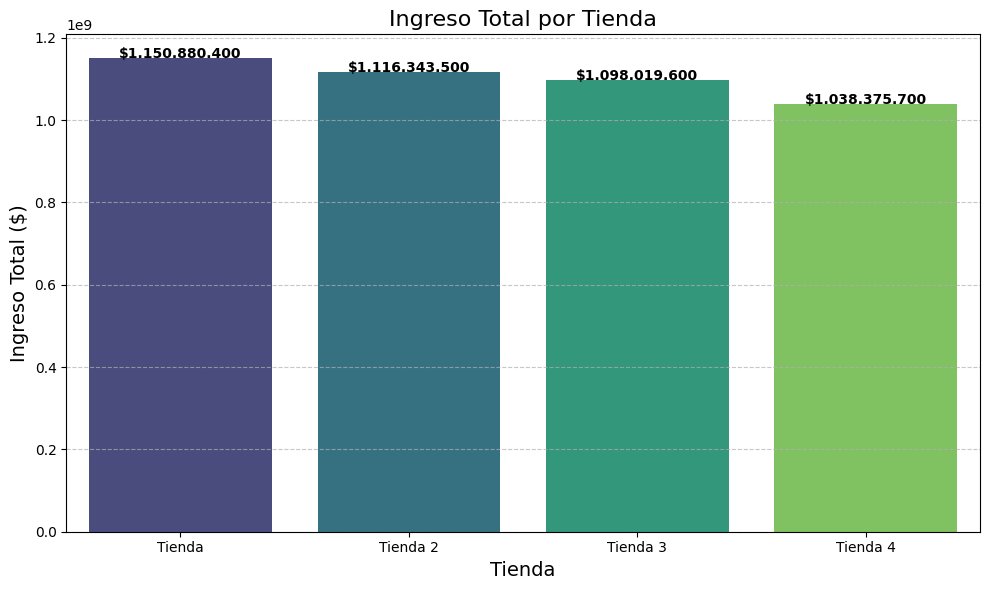

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Función para crear gráfico de ingresos por tienda
def visualizar_ingresos(tienda, tienda2, tienda3, tienda4):
    # Calcular ingresos totales
    ingresos = {
        'Tienda': tienda['Precio'].sum(),
        'Tienda 2': tienda2['Precio'].sum(),
        'Tienda 3': tienda3['Precio'].sum(),
        'Tienda 4': tienda4['Precio'].sum()
    }
    
    # Convertir a DataFrame para visualización
    df_ingresos = pd.DataFrame(list(ingresos.items()), columns=['Tienda', 'Ingreso Total'])
    
    # Crear figura y eje
    plt.figure(figsize=(10, 6))
    
    # Crear el gráfico de barras
    sns.barplot(x='Tienda', y='Ingreso Total', data=df_ingresos, palette='viridis')
    
    # Añadir etiquetas con formato de moneda a las barras
    for i, v in enumerate(df_ingresos['Ingreso Total']):
        plt.text(i, v + 50000, f'${v:,.0f}'.replace(',', '.'), 
                 ha='center', fontweight='bold')
    
    # Configurar el gráfico
    plt.title('Ingreso Total por Tienda', fontsize=16)
    plt.xlabel('Tienda', fontsize=14)
    plt.ylabel('Ingreso Total ($)', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Guardar la figura
    plt.savefig('visualizaciones/ingresos_por_tienda.png', dpi=300, bbox_inches='tight')
    plt.show()

# Llamar a la función
visualizar_ingresos(tienda, tienda2, tienda3, tienda4)

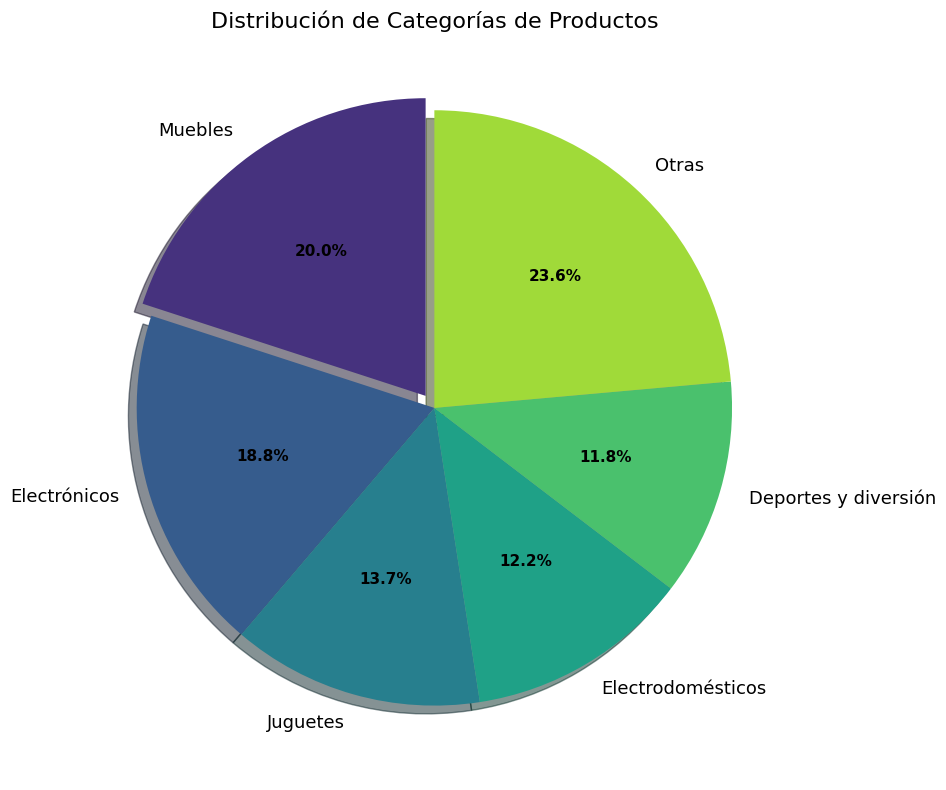

In [6]:
def visualizar_categorias(tienda, tienda2, tienda3, tienda4):
    # Combinar datos de todas las tiendas
    todas_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])
    
    # Contar productos por categoría
    categorias = todas_tiendas['Categoría del Producto'].value_counts()
    
    # Seleccionar las 5 categorías principales
    top_categorias = categorias.head(5)
    otras = pd.Series({'Otras': categorias[5:].sum()})
    categorias_final = pd.concat([top_categorias, otras])
    
    # Crear figura
    plt.figure(figsize=(10, 8))
    
    # Crear gráfico de torta
    wedges, texts, autotexts = plt.pie(
        categorias_final, 
        labels=categorias_final.index, 
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        explode=[0.05, 0, 0, 0, 0, 0],  # Destacar la primera categoría
        colors=sns.color_palette('viridis', len(categorias_final))
    )
    
    # Mejorar la apariencia de las etiquetas
    plt.setp(autotexts, size=11, weight='bold')
    plt.setp(texts, size=13)
    
    # Agregar título
    plt.title('Distribución de Categorías de Productos', fontsize=16)
    
    # Ajustar layout y guardar
    plt.tight_layout()
    plt.savefig('visualizaciones/distribucion_categorias.png', dpi=300, bbox_inches='tight')
    plt.show()

# Llamar a la función
visualizar_categorias(tienda, tienda2, tienda3, tienda4)

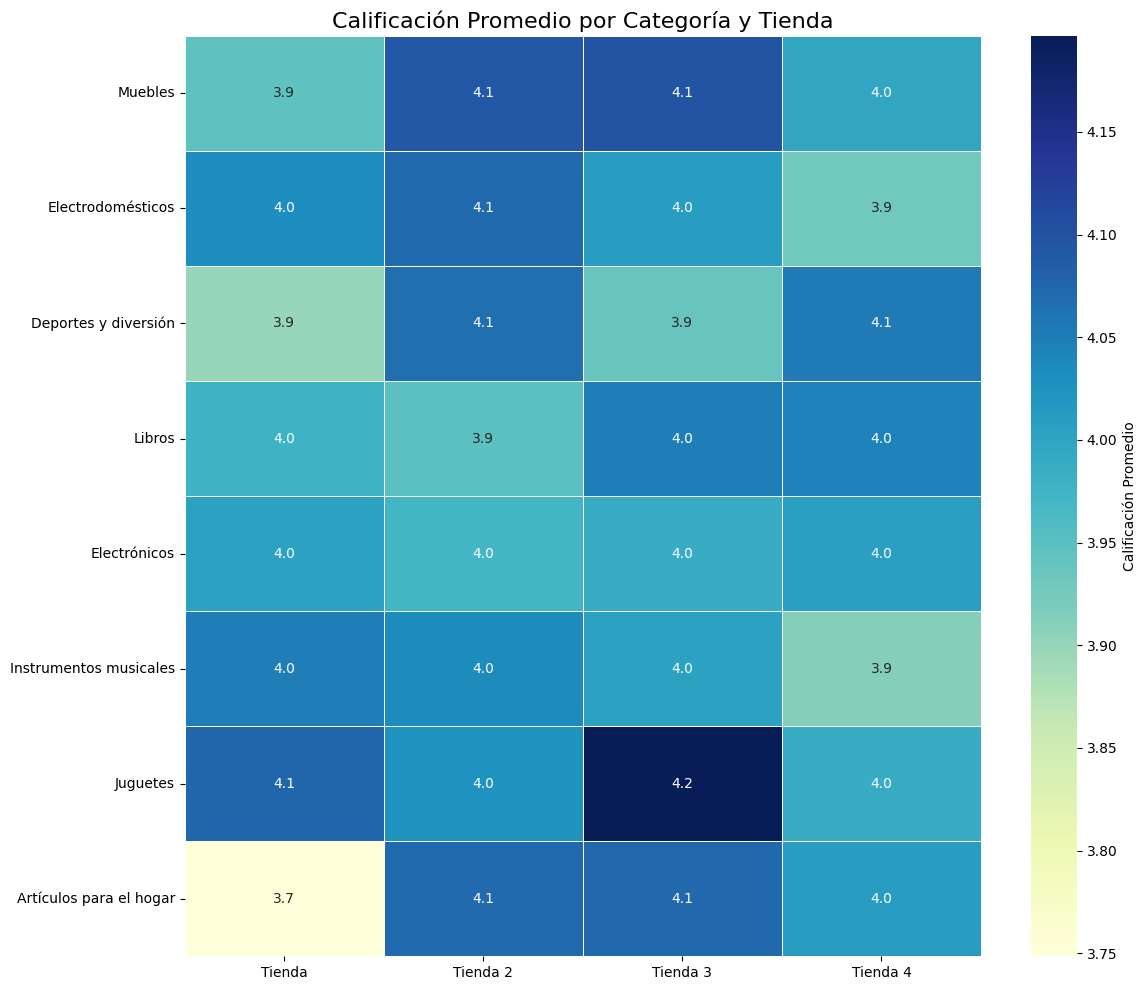

In [10]:
def visualizar_calificaciones_por_categoria(tienda, tienda2, tienda3, tienda4):
    # Crear diccionario de tiendas
    tiendas = {
        'Tienda': tienda,
        'Tienda 2': tienda2,
        'Tienda 3': tienda3,
        'Tienda 4': tienda4
    }
    
    # Preparar datos para el heatmap
    # Obtener todas las categorías únicas
    todas_categorias = set()
    for datos in tiendas.values():
        todas_categorias.update(datos['Categoría del Producto'].unique())
    
    # Inicializar matriz para datos del heatmap
    categorias_list = list(todas_categorias)
    tiendas_list = list(tiendas.keys())
    calificaciones_matriz = np.zeros((len(categorias_list), len(tiendas_list)))
    
    # Llenar la matriz con calificaciones promedio
    for i, categoria in enumerate(categorias_list):
        for j, (nombre_tienda, datos_tienda) in enumerate(tiendas.items()):
            # Filtrar por categoría y calcular promedio de calificación
            datos_filtrados = datos_tienda[datos_tienda['Categoría del Producto'] == categoria]
            if not datos_filtrados.empty:
                calificaciones_matriz[i, j] = datos_filtrados['Calificación'].mean()
            else:
                calificaciones_matriz[i, j] = np.nan  # Sin datos para esta combinación
    
    # Crear DataFrame para el heatmap
    df_heatmap = pd.DataFrame(calificaciones_matriz, 
                             index=categorias_list, 
                             columns=tiendas_list)
    
    # Crear figura
    plt.figure(figsize=(12, 10))
    
    # Crear heatmap
    sns.heatmap(df_heatmap, annot=True, cmap='YlGnBu', fmt='.1f', 
                linewidths=0.5, cbar_kws={'label': 'Calificación Promedio'})
    
    # Configurar el gráfico
    plt.title('Calificación Promedio por Categoría y Tienda', fontsize=16)
    plt.tight_layout()
    
    # Guardar y mostrar
    plt.savefig('visualizaciones/calificaciones_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

# Llamar a la función
visualizar_calificaciones_por_categoria(tienda, tienda2, tienda3, tienda4)

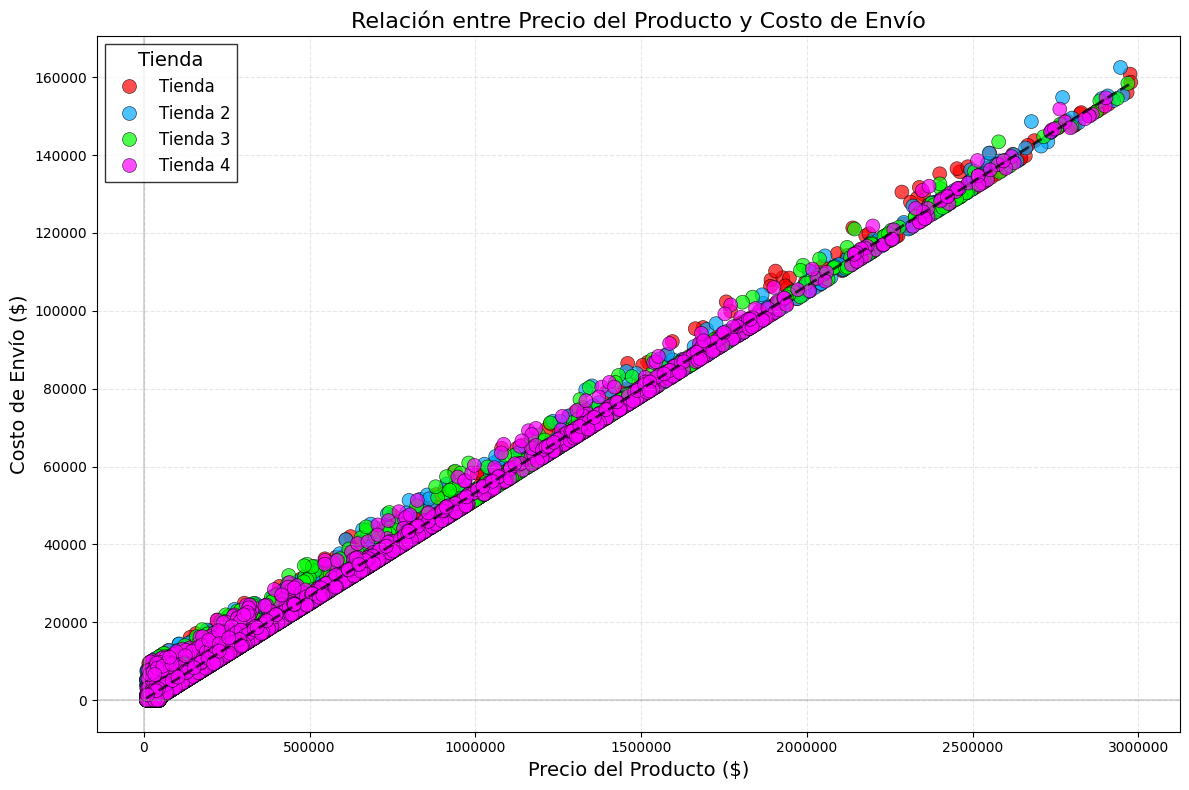

In [5]:
def visualizar_relacion_precio_envio(tienda, tienda2, tienda3, tienda4):
    # Combinar datos de todas las tiendas
    tiendas_dict = {
        'Tienda': tienda,
        'Tienda 2': tienda2,
        'Tienda 3': tienda3,
        'Tienda 4': tienda4
    }
    
    # Crear DataFrame con datos combinados
    datos_combinados = []
    for nombre_tienda, df in tiendas_dict.items():
        df_temp = df.copy()
        df_temp['Tienda'] = nombre_tienda
        datos_combinados.append(df_temp)
    
    datos_todos = pd.concat(datos_combinados)
    
    # Crear figura
    plt.figure(figsize=(12, 8))
    
    # Usar una paleta de colores con alto contraste
    paleta_contrastante = ['#FF0000', '#00AAFF', '#00FF00', '#FF00FF']  # Rojo, Azul, Verde, Magenta
    
    # Crear gráfico de dispersión con colores contrastantes
    scatter = sns.scatterplot(x='Precio', y='Costo de envío', 
                   hue='Tienda', data=datos_todos, 
                   alpha=0.7, s=100, palette=paleta_contrastante,
                   edgecolor='black', linewidth=0.5)
    
    # Añadir línea de regresión
    sns.regplot(x='Precio', y='Costo de envío', 
               data=datos_todos, scatter=False, 
               line_kws={"color": "black", "alpha": 0.7, "lw": 2, "linestyle": "--"})
    
    # Configurar el gráfico
    plt.title('Relación entre Precio del Producto y Costo de Envío', fontsize=16)
    plt.xlabel('Precio del Producto ($)', fontsize=14)
    plt.ylabel('Costo de Envío ($)', fontsize=14)
    plt.grid(linestyle='--', alpha=0.3)
    
    # Ajustar los límites y formato de ejes
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    
    # Mejorar la leyenda
    plt.legend(title='Tienda', title_fontsize=14, fontsize=12, 
              edgecolor='black', fancybox=False, loc='upper left')
    
    # Añadir líneas de marca de agua en los ejes para mejor referencia
    plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='gray', linestyle='-', alpha=0.3)
    
    # Guardar y mostrar
    plt.tight_layout()
    plt.savefig('visualizaciones/relacion_precio_envio.png', dpi=300, bbox_inches='tight')
    plt.show()

# IMPORTANTE: Asegúrate de que esta línea esté presente y se ejecute
visualizar_relacion_precio_envio(tienda, tienda2, tienda3, tienda4)

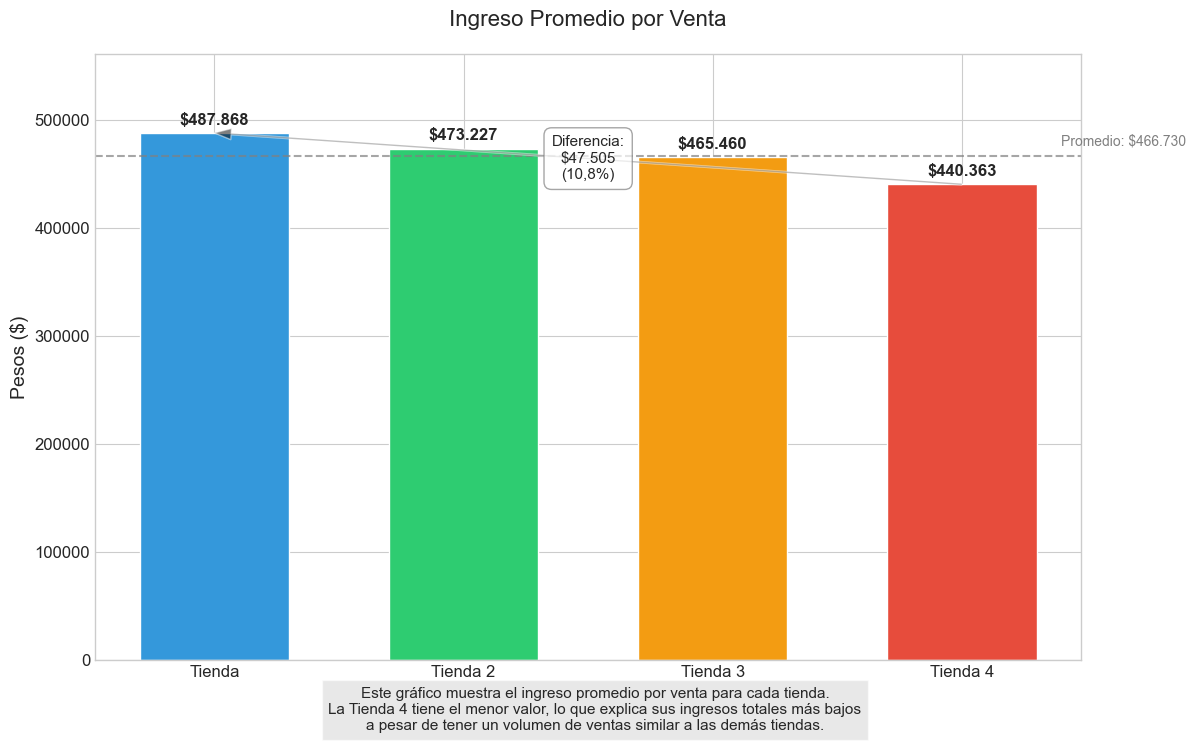

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Datos de ingresos totales y número de ventas
tiendas = ['Tienda', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos_totales = [1150880400, 1116343500, 1098019600, 1038375700]  # En pesos
total_ventas = [2359, 2359, 2359, 2358]  # Número total de ventas

# Calcular ingreso promedio por venta
ingresos_promedio = [ingresos_totales[i]/total_ventas[i] for i in range(len(tiendas))]

# Crear figura
plt.figure(figsize=(12, 7))

# Configurar estilo
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'

# Crear barras con gradiente de color para destacar la diferencia
colores = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c']  # Azul, verde, naranja, rojo

# Crear el gráfico de barras
bars = plt.bar(tiendas, ingresos_promedio, width=0.6, color=colores)

# Añadir etiquetas de valores formateados con separador de miles y decimales
for i, bar in enumerate(bars):
    valor = ingresos_promedio[i]
    # Formatear con separador de miles (.) y decimales (,)
    valor_str = f"${valor:,.0f}".replace(',', 'X').replace('.', ',').replace('X', '.')
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5000, 
             valor_str, ha='center', va='bottom', fontsize=12, fontweight='bold')

# Añadir línea de referencia con el promedio general
promedio_general = np.mean(ingresos_promedio)
plt.axhline(y=promedio_general, color='gray', linestyle='--', alpha=0.7)
plt.text(len(tiendas)-0.1, promedio_general*1.02, 
         f'Promedio: ${promedio_general:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.'), 
         color='gray', fontsize=10, ha='right')

# Destacar la diferencia entre la mejor y la peor tienda
max_valor = max(ingresos_promedio)
min_valor = min(ingresos_promedio)
diferencia = max_valor - min_valor
diferencia_porcentaje = (diferencia / min_valor) * 100

# Añadir flecha y texto explicativo
plt.annotate('', xy=(0, max_valor), xytext=(3, min_valor),
             arrowprops=dict(facecolor='black', width=1, headwidth=8, alpha=0.5))
plt.text(1.5, (max_valor + min_valor)/2, 
         f"Diferencia:\n${diferencia:,.0f}\n({diferencia_porcentaje:.1f}%)".replace(',', 'X').replace('.', ',').replace('X', '.'), 
         ha='center', va='center', fontsize=11, 
         bbox=dict(facecolor='white', edgecolor='gray', alpha=0.7, boxstyle='round,pad=0.5'))

# Configurar gráfico
plt.title('Ingreso Promedio por Venta', fontsize=16, pad=20)
plt.ylabel('Pesos ($)', fontsize=14)
plt.ylim(0, max(ingresos_promedio) * 1.15)  # Ajustar límite vertical

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Añadir nota explicativa
plt.figtext(0.5, -0.05, 
           "Este gráfico muestra el ingreso promedio por venta para cada tienda.\nLa Tienda 4 tiene el menor valor, lo que explica sus ingresos totales más bajos\na pesar de tener un volumen de ventas similar a las demás tiendas.",
           ha="center", fontsize=11, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})

plt.tight_layout()
plt.savefig('visualizaciones/ingreso_promedio_por_venta.png', dpi=300, bbox_inches='tight')
plt.show()

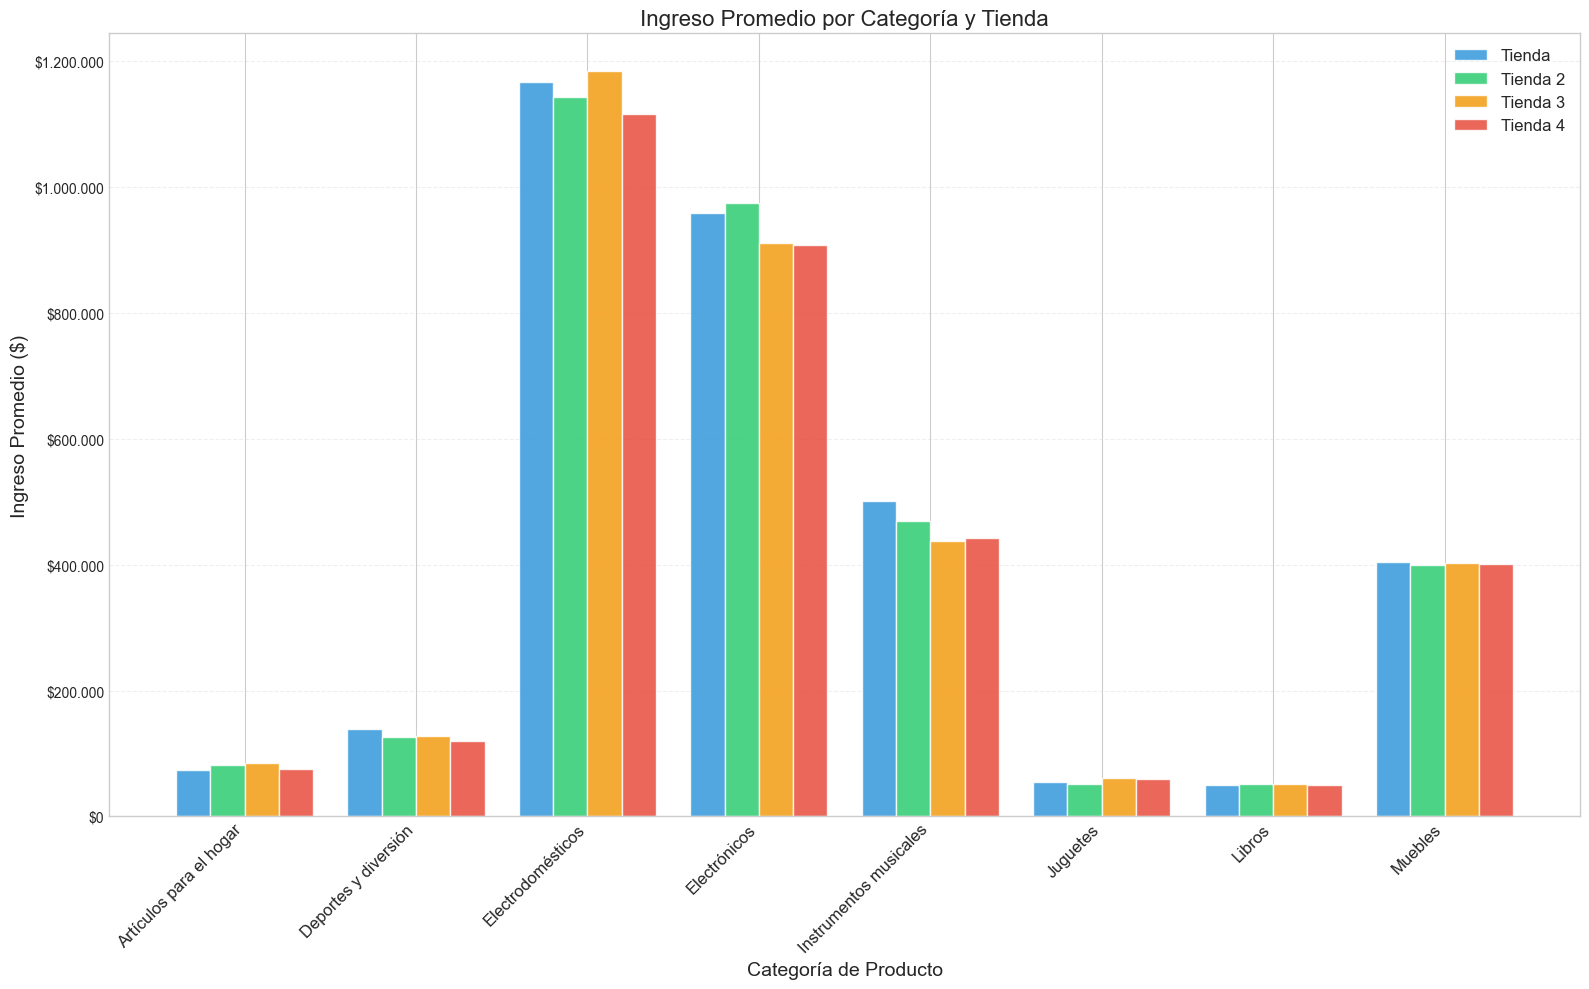


=== INGRESO PROMEDIO POR CATEGORÍA Y TIENDA ===
Tienda                      Tienda   Tienda 2   Tienda 3   Tienda 4
Categoria                                                          
Electrodomésticos       $1.165.658 $1.142.845 $1.184.309 $1.115.198
Electrónicos              $958.691   $973.533   $910.811   $907.929
Instrumentos musicales    $501.643   $468.707   $437.180   $441.779
Muebles                   $403.513   $399.155   $402.950   $401.102
Deportes y diversión      $138.345   $126.344   $128.495   $120.397
Artículos para el hogar    $74.260    $81.475    $85.085    $74.998
Juguetes                   $55.542    $50.944    $61.591    $59.947
Libros                     $50.780    $51.224    $51.344    $49.847


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter  # Mover esta importación al principio

def analizar_ingreso_promedio_por_categoria(tienda, tienda2, tienda3, tienda4):
    # Crear diccionario con las tiendas
    tiendas_dict = {
        'Tienda': tienda,
        'Tienda 2': tienda2,
        'Tienda 3': tienda3,
        'Tienda 4': tienda4
    }
    
    # Lista para almacenar resultados
    resultados = []
    
    # Analizar cada tienda
    for nombre_tienda, datos_tienda in tiendas_dict.items():
        # Agrupar por categoría y calcular el promedio de precio
        categoria_stats = datos_tienda.groupby('Categoría del Producto')['Precio'].agg(['mean', 'count']).reset_index()
        
        # Renombrar columnas
        categoria_stats.columns = ['Categoria', 'Ingreso Promedio', 'Cantidad']
        
        # Añadir columna con nombre de tienda
        categoria_stats['Tienda'] = nombre_tienda
        
        # Añadir a resultados
        resultados.append(categoria_stats)
    
    # Combinar resultados
    df_resultados = pd.concat(resultados)
    
    return df_resultados

# Ejecutar la función
resultado_ingresos = analizar_ingreso_promedio_por_categoria(tienda, tienda2, tienda3, tienda4)

# Obtener la lista de categorías únicas
categorias = resultado_ingresos['Categoria'].unique()

# Crear figura
plt.figure(figsize=(16, 10))

# Definir colores para las tiendas
colores = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c']  # Azul, verde, naranja, rojo

# Configurar el número de barras y su ancho
num_tiendas = 4
ancho_barra = 0.8 / num_tiendas
posiciones = np.arange(len(categorias))

# Crear barras agrupadas para cada tienda
for i, nombre_tienda in enumerate(['Tienda', 'Tienda 2', 'Tienda 3', 'Tienda 4']):
    # Filtrar datos para esta tienda
    datos_tienda = resultado_ingresos[resultado_ingresos['Tienda'] == nombre_tienda]
    
    # Ordenar por categoría para mantener el mismo orden
    datos_ordenados = pd.DataFrame(index=categorias)
    datos_ordenados['Ingreso Promedio'] = datos_tienda.set_index('Categoria')['Ingreso Promedio']
    datos_ordenados = datos_ordenados.fillna(0)
    
    # Crear barra para esta tienda
    x_pos = posiciones + i * ancho_barra - (ancho_barra * num_tiendas / 2) + ancho_barra/2
    plt.bar(x_pos, datos_ordenados['Ingreso Promedio'], width=ancho_barra, 
            label=nombre_tienda, color=colores[i], alpha=0.85)

# Configurar gráfico
plt.title('Ingreso Promedio por Categoría y Tienda', fontsize=16)
plt.xlabel('Categoría de Producto', fontsize=14)
plt.ylabel('Ingreso Promedio ($)', fontsize=14)
plt.xticks(posiciones, categorias, rotation=45, ha='right', fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Formatear el eje Y con separador de miles
def format_pesos(x, pos):
    return f'${x:,.0f}'.replace(',', '.')

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_pesos))

plt.tight_layout()
plt.savefig('visualizaciones/ingreso_promedio_por_categoria.png', dpi=300, bbox_inches='tight')
plt.show()

# También crear una tabla con los valores exactos
pivot_table = resultado_ingresos.pivot_table(
    index='Categoria', 
    columns='Tienda', 
    values='Ingreso Promedio', 
    aggfunc='mean'
).round(0)

# Ordenar por el promedio de todas las tiendas (de mayor a menor)
pivot_table['Promedio'] = pivot_table.mean(axis=1)
pivot_table = pivot_table.sort_values('Promedio', ascending=False)
pivot_table = pivot_table.drop('Promedio', axis=1)

# Configuración para mostrar los valores con formato de moneda y punto como separador de miles
pd.options.display.float_format = lambda x: '${:,.0f}'.format(x).replace(',', '.')

# Imprimir la tabla con el formato actualizado
print("\n=== INGRESO PROMEDIO POR CATEGORÍA Y TIENDA ===")
print(pivot_table)


=== PORCENTAJE DE VENTAS DE LAS 5 CATEGORÍAS PRINCIPALES ===
Tienda: Tienda
  Ingreso Total: $1.150.880.400
  Ingreso 5 Categorías Principales: $1.111.401.400
  Porcentaje del Total: 96.57%

Tienda: Tienda 2
  Ingreso Total: $1.116.343.500
  Ingreso 5 Categorías Principales: $1.075.560.000
  Porcentaje del Total: 96.35%

Tienda: Tienda 3
  Ingreso Total: $1.098.019.600
  Ingreso 5 Categorías Principales: $1.054.059.800
  Porcentaje del Total: 96.00%

Tienda: Tienda 4
  Ingreso Total: $1.038.375.700
  Ingreso 5 Categorías Principales: $993.717.700
  Porcentaje del Total: 95.70%



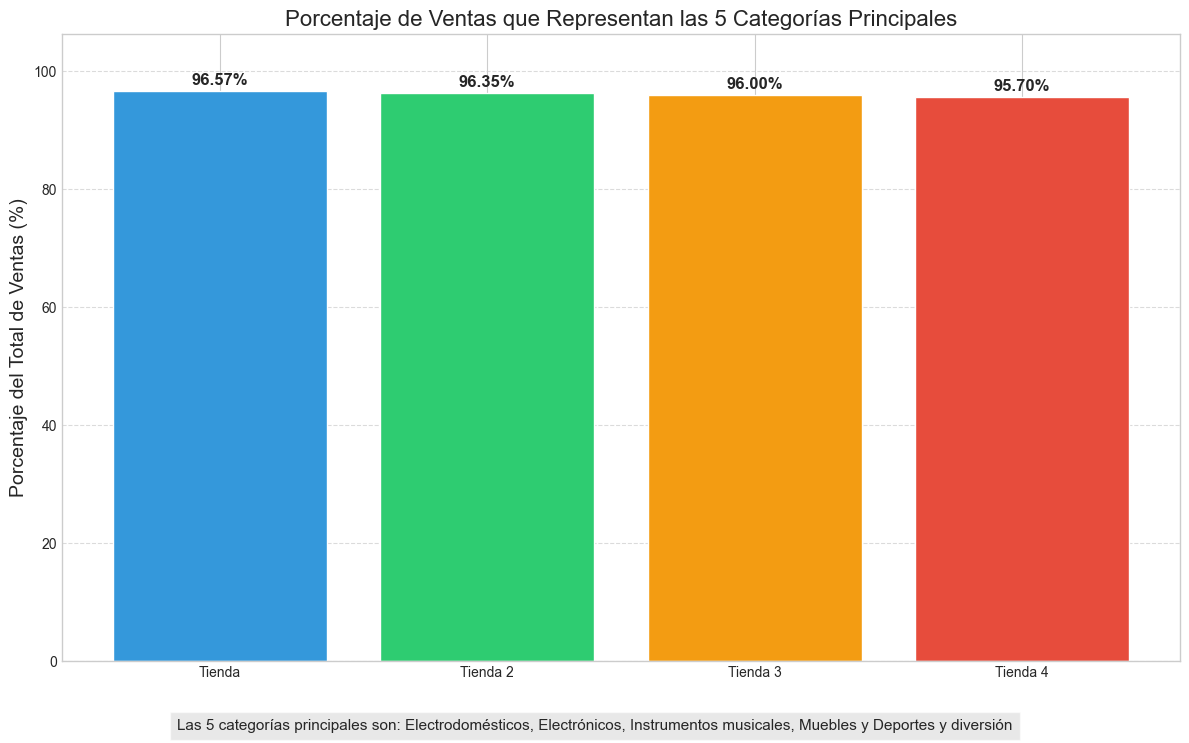

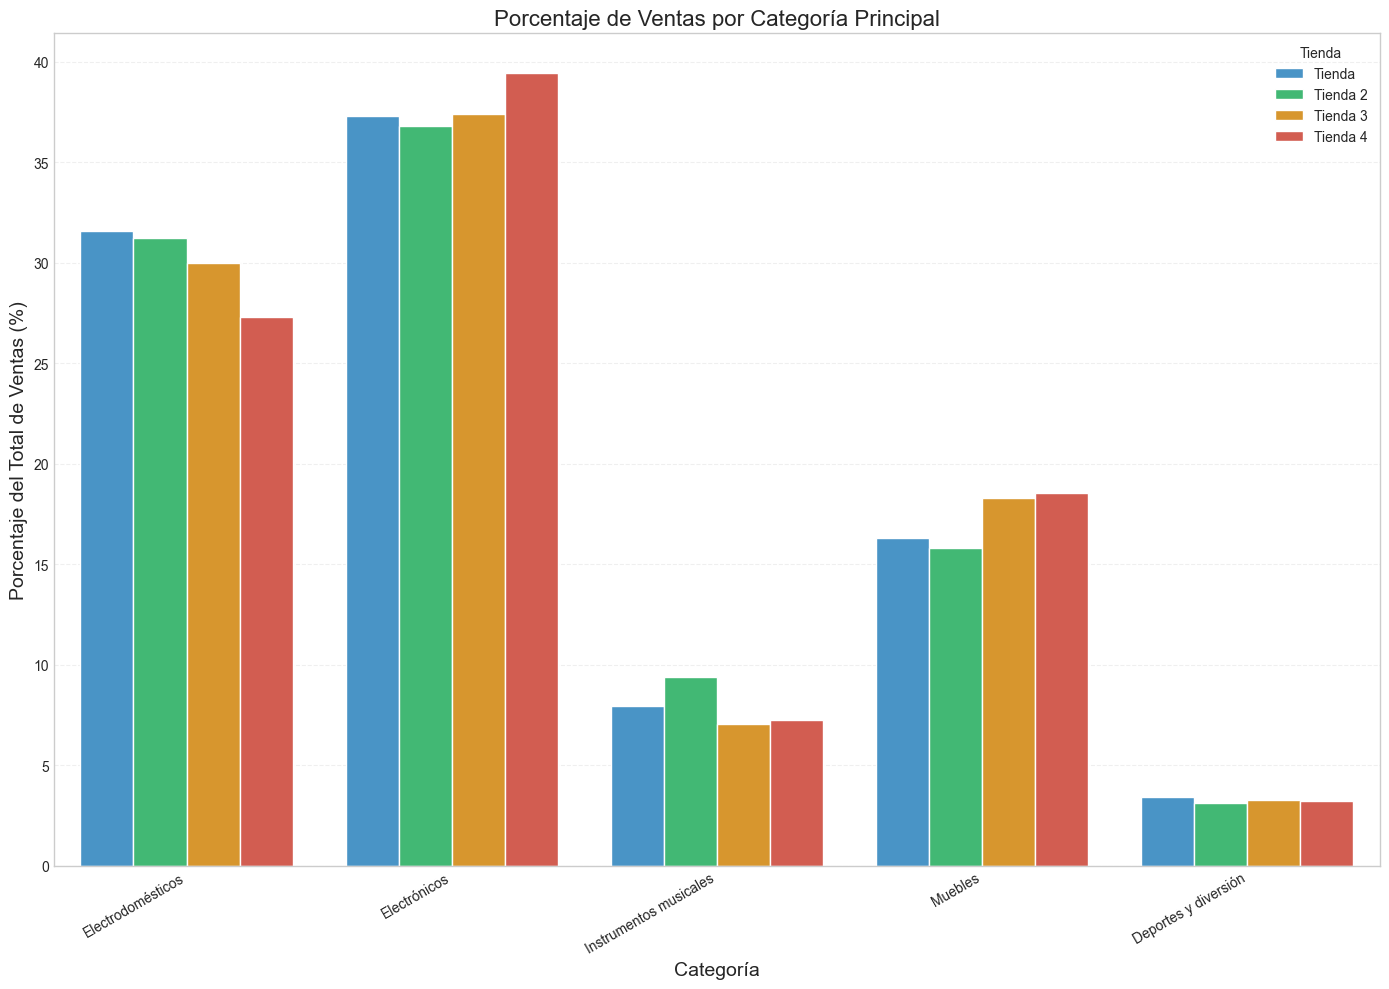

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def calcular_porcentaje_categorias_principales(tienda, tienda2, tienda3, tienda4):
    # Crear diccionario con las tiendas
    tiendas_dict = {
        'Tienda': tienda,
        'Tienda 2': tienda2,
        'Tienda 3': tienda3,
        'Tienda 4': tienda4
    }
    
    # Categorías principales a analizar
    categorias_principales = [
        'Electrodomésticos', 
        'Electrónicos', 
        'Instrumentos musicales', 
        'Muebles', 
        'Deportes y diversión'
    ]
    
    # Diccionario para almacenar resultados
    resultados = {}
    
    # Analizar cada tienda
    for nombre_tienda, datos_tienda in tiendas_dict.items():
        # Calcular el ingreso total de la tienda
        ingreso_total = datos_tienda['Precio'].sum()
        
        # Calcular el ingreso por cada categoría principal
        ingresos_por_categoria = {}
        porcentajes_por_categoria = {}
        
        for categoria in categorias_principales:
            # Filtrar datos de esta categoría
            datos_categoria = datos_tienda[datos_tienda['Categoría del Producto'] == categoria]
            
            # Calcular ingreso de esta categoría
            ingreso_categoria = datos_categoria['Precio'].sum()
            
            # Calcular porcentaje sobre el total
            porcentaje = (ingreso_categoria / ingreso_total) * 100
            
            # Guardar resultados
            ingresos_por_categoria[categoria] = ingreso_categoria
            porcentajes_por_categoria[categoria] = porcentaje
        
        # Calcular el total combinado de las categorías principales
        ingreso_combinado = sum(ingresos_por_categoria.values())
        porcentaje_combinado = (ingreso_combinado / ingreso_total) * 100
        
        # Guardar todos los resultados
        resultados[nombre_tienda] = {
            'Ingreso Total': ingreso_total,
            'Ingreso Categorías Principales': ingreso_combinado,
            'Porcentaje Categorías Principales': porcentaje_combinado,
            'Ingresos por Categoría': ingresos_por_categoria,
            'Porcentajes por Categoría': porcentajes_por_categoria
        }
    
    return resultados

# Ejecutar la función
resultados = calcular_porcentaje_categorias_principales(tienda, tienda2, tienda3, tienda4)

# Crear DataFrame para el resumen
data_resumen = []
for nombre_tienda, datos in resultados.items():
    data_resumen.append({
        'Tienda': nombre_tienda,
        'Ingreso Total': datos['Ingreso Total'],
        'Ingreso 5 Categorías Principales': datos['Ingreso Categorías Principales'],
        'Porcentaje del Total (%)': datos['Porcentaje Categorías Principales']
    })

df_resumen = pd.DataFrame(data_resumen)

# Mostrar tabla de resumen con formato manual
print("\n=== PORCENTAJE DE VENTAS DE LAS 5 CATEGORÍAS PRINCIPALES ===")
for _, row in df_resumen.iterrows():
    ingreso_total_str = '${:,.0f}'.format(row['Ingreso Total']).replace(',', '.')
    ingreso_cat_str = '${:,.0f}'.format(row['Ingreso 5 Categorías Principales']).replace(',', '.')
    porcentaje_str = '{:.2f}%'.format(row['Porcentaje del Total (%)'])
    
    print(f"Tienda: {row['Tienda']}")
    print(f"  Ingreso Total: {ingreso_total_str}")
    print(f"  Ingreso 5 Categorías Principales: {ingreso_cat_str}")
    print(f"  Porcentaje del Total: {porcentaje_str}")
    print()

# Crear gráfico de barras con los porcentajes
plt.figure(figsize=(12, 7))

# Graficar el porcentaje combinado
bars = plt.bar(df_resumen['Tienda'], df_resumen['Porcentaje del Total (%)'], 
              color=['#3498db', '#2ecc71', '#f39c12', '#e74c3c'])

# Añadir etiquetas de porcentaje
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f"{df_resumen['Porcentaje del Total (%)'].iloc[i]:.2f}%", 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Configurar gráfico
plt.title('Porcentaje de Ventas que Representan las 5 Categorías Principales', fontsize=16)
plt.ylabel('Porcentaje del Total de Ventas (%)', fontsize=14)
plt.ylim(0, max(df_resumen['Porcentaje del Total (%)']) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir nota explicativa
plt.figtext(0.5, -0.05, 
           "Las 5 categorías principales son: Electrodomésticos, Electrónicos, Instrumentos musicales, Muebles y Deportes y diversión",
           ha="center", fontsize=11, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})

plt.tight_layout()
plt.savefig('visualizaciones/porcentaje_categorias_principales.png', dpi=300, bbox_inches='tight')
plt.show()

# También crear un gráfico detallado mostrando el porcentaje de cada categoría principal
categorias = list(resultados['Tienda']['Porcentajes por Categoría'].keys())
data_por_categoria = []

for tienda in resultados:
    for categoria in categorias:
        porcentaje = resultados[tienda]['Porcentajes por Categoría'][categoria]
        data_por_categoria.append({
            'Tienda': tienda,
            'Categoría': categoria,
            'Porcentaje': porcentaje
        })

df_categorias = pd.DataFrame(data_por_categoria)

# Crear figura para el gráfico por categorías
plt.figure(figsize=(14, 10))

# Crear gráfico de barras agrupadas
sns.barplot(x='Categoría', y='Porcentaje', hue='Tienda', data=df_categorias, palette=['#3498db', '#2ecc71', '#f39c12', '#e74c3c'])

# Configurar gráfico
plt.title('Porcentaje de Ventas por Categoría Principal', fontsize=16)
plt.xlabel('Categoría', fontsize=14)
plt.ylabel('Porcentaje del Total de Ventas (%)', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.legend(title='Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('visualizaciones/porcentaje_por_categoria.png', dpi=300, bbox_inches='tight')
plt.show()


=== PORCENTAJE DE CADA CATEGORÍA SOBRE EL TOTAL POR TIENDA ===

Tienda:
  Electrodomésticos: 31.60%
  Electrónicos: 37.32%
  Instrumentos musicales: 7.93%
  Muebles: 16.30%
  Deportes y diversión: 3.41%
  TOTAL 5 CATEGORÍAS: 96.57%

Tienda 2:
  Electrodomésticos: 31.22%
  Electrónicos: 36.80%
  Instrumentos musicales: 9.40%
  Muebles: 15.80%
  Deportes y diversión: 3.11%
  TOTAL 5 CATEGORÍAS: 96.35%

Tienda 3:
  Electrodomésticos: 29.98%
  Electrónicos: 37.41%
  Instrumentos musicales: 7.05%
  Muebles: 18.31%
  Deportes y diversión: 3.24%
  TOTAL 5 CATEGORÍAS: 96.00%

Tienda 4:
  Electrodomésticos: 27.28%
  Electrónicos: 39.43%
  Instrumentos musicales: 7.23%
  Muebles: 18.54%
  Deportes y diversión: 3.21%
  TOTAL 5 CATEGORÍAS: 95.70%


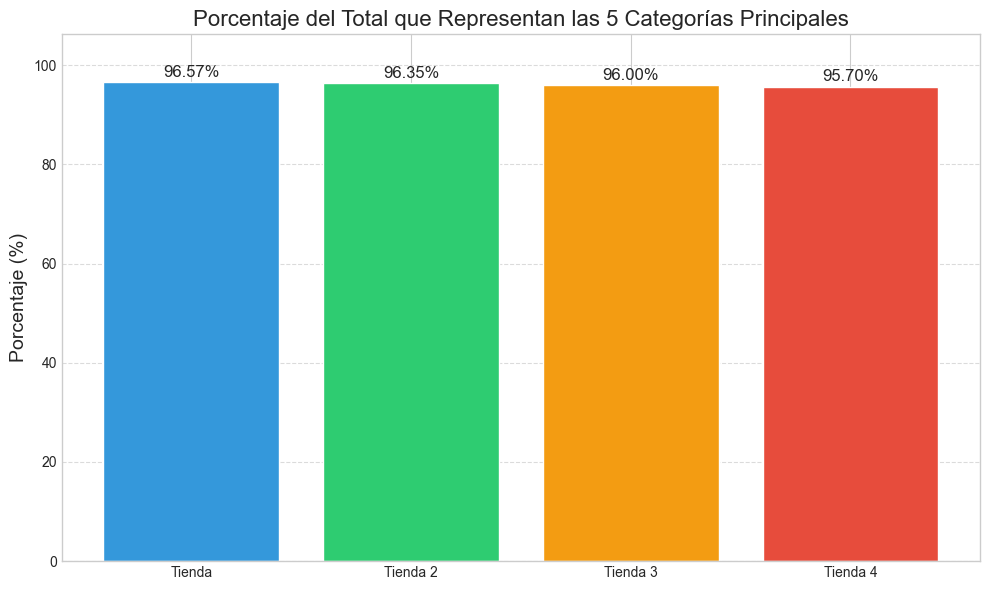

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que tienda, tienda2, etc. ya están definidos y son DataFrames
# Si no lo son, cárgalos:
# tienda = pd.read_csv('ruta_a_tienda.csv')
# tienda2 = pd.read_csv('ruta_a_tienda2.csv')
# etc.

# Categorías que queremos analizar
categorias = [
    'Electrodomésticos', 
    'Electrónicos', 
    'Instrumentos musicales', 
    'Muebles', 
    'Deportes y diversión'
]

# Crear una lista para almacenar los resultados
resultados = []

# Analizar Tienda
ingreso_total = tienda['Precio'].sum()
for cat in categorias:
    datos_cat = tienda[tienda['Categoría del Producto'] == cat]
    ingreso_cat = datos_cat['Precio'].sum()
    porcentaje = (ingreso_cat / ingreso_total) * 100
    resultados.append(['Tienda', cat, porcentaje])

# Analizar Tienda 2
ingreso_total = tienda2['Precio'].sum()
for cat in categorias:
    datos_cat = tienda2[tienda2['Categoría del Producto'] == cat]
    ingreso_cat = datos_cat['Precio'].sum()
    porcentaje = (ingreso_cat / ingreso_total) * 100
    resultados.append(['Tienda 2', cat, porcentaje])

# Analizar Tienda 3
ingreso_total = tienda3['Precio'].sum()
for cat in categorias:
    datos_cat = tienda3[tienda3['Categoría del Producto'] == cat]
    ingreso_cat = datos_cat['Precio'].sum()
    porcentaje = (ingreso_cat / ingreso_total) * 100
    resultados.append(['Tienda 3', cat, porcentaje])

# Analizar Tienda 4
ingreso_total = tienda4['Precio'].sum()
for cat in categorias:
    datos_cat = tienda4[tienda4['Categoría del Producto'] == cat]
    ingreso_cat = datos_cat['Precio'].sum()
    porcentaje = (ingreso_cat / ingreso_total) * 100
    resultados.append(['Tienda 4', cat, porcentaje])

# Crear DataFrame con los resultados
df_resultados = pd.DataFrame(resultados, columns=['Tienda', 'Categoría', 'Porcentaje'])

# Mostrar los resultados agrupados por tienda y categoría
print("\n=== PORCENTAJE DE CADA CATEGORÍA SOBRE EL TOTAL POR TIENDA ===")
for nombre_tienda in ['Tienda', 'Tienda 2', 'Tienda 3', 'Tienda 4']:
    print(f"\n{nombre_tienda}:")
    for cat in categorias:
        porcentaje = df_resultados[(df_resultados['Tienda'] == nombre_tienda) & 
                                  (df_resultados['Categoría'] == cat)]['Porcentaje'].values[0]
        print(f"  {cat}: {porcentaje:.2f}%")
    
    # Calcular y mostrar el total para esta tienda
    total = df_resultados[df_resultados['Tienda'] == nombre_tienda]['Porcentaje'].sum()
    print(f"  TOTAL 5 CATEGORÍAS: {total:.2f}%")

# Crear un gráfico de barras para el total por tienda
totales_por_tienda = []
for nombre_tienda in ['Tienda', 'Tienda 2', 'Tienda 3', 'Tienda 4']:
    total = df_resultados[df_resultados['Tienda'] == nombre_tienda]['Porcentaje'].sum()
    totales_por_tienda.append(total)

plt.figure(figsize=(10, 6))
bars = plt.bar(['Tienda', 'Tienda 2', 'Tienda 3', 'Tienda 4'], 
              totales_por_tienda, color=['#3498db', '#2ecc71', '#f39c12', '#e74c3c'])

# Añadir etiquetas con los porcentajes
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f"{totales_por_tienda[i]:.2f}%", ha='center', va='bottom', fontsize=12)

plt.title('Porcentaje del Total que Representan las 5 Categorías Principales', fontsize=16)
plt.ylabel('Porcentaje (%)', fontsize=14)
plt.ylim(0, max(totales_por_tienda) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('visualizaciones/porcentaje_total_categorias.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
Informe final

Basándome en estos datos detallados, puedo proporcionar un informe con recomendaciones más fundamentadas sobre qué tienda debería vender el Sr. Juan.

Los datos muestran claramente que la Tienda 4 tiene el peor desempeño financiero entre las cuatro tiendas,
lo que la hace la candidata lógica para vender.


Razones principales para vender la Tienda 4:

Menor ingreso promedio por venta: Como muestra el gráfico, la Tienda 4 tiene un ingreso promedio por venta de $440.363, 
significativamente inferior al de la Tienda 1 ($487.868) y por debajo del promedio general de $466.730.

Esto representa una diferencia de $47.505 (10.8%) por venta respecto a la mejor tienda.
    
Menor ingreso total: La Tienda 4 genera $1.038.375.700 en ingresos totales, mientras que la Tienda 1 genera $1.150.880.400, 
una diferencia de más de $112 millones.

Similar estructura de ventas pero menor rendimiento: 
Todas las tiendas tienen una distribución similar de ventas por categoría 
(aproximadamente 96% de los ingresos provienen de las 5 categorías principales), pero la Tienda 4 obtiene menos ingresos por cada venta realizada.
Menor rendimiento en categorías clave:

En Electrodomésticos: $1.115.198 por venta en la Tienda 4 vs $1.184.309 En la Tienda 3 
En Electrónicos: $907.929 por venta En la Tienda 4 vs $973.533 en la Tienda 2
En Deportes y diversión: $120.397 por venta en la Tienda 4 vs $138.345 en la Tienda 1


Menor dependencia de Electrodomésticos: 
La Tienda 4 tiene el porcentaje más bajo de ventas en Electrodomésticos (27.28% vs 31.60% en la Tienda 1),
que es una de las categorías con mayor ingreso promedio por venta.

Recomendación:
El Sr. Juan debería vender la Tienda 4 por las siguientes razones estratégicas:

Es la tienda con menor ingreso total y menor ingreso promedio por venta.
A pesar de tener un volumen de ventas similar a las otras tiendas, genera significativamente menos ingresos.
No muestra ventajas competitivas en ninguna categoría de productos que justifiquen mantenerla.